In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
df=pd.read_csv('airfoil_self_noise.dat', sep='\t', header=None, names=["Frequency", "Angle_of_Attack","Chord_length","F-S_velocity", "S_s_thickness", "S_S_Pressure_level"] )

In [21]:
df

,Frequency,Angle_of_Attack,Chord_length,F-S_velocity,S_s_thickness,S_S_Pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


##### This problem has the following inputs:

1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:

6. Scaled sound pressure level, in decibels.

In [22]:
df.head()

,Frequency,Angle_of_Attack,Chord_length,F-S_velocity,S_s_thickness,S_S_Pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [23]:
# Another way of giving column names
# df.columns=["Frequency","Angle of attack","Chord length","Free-stream velocity","Suction side","pressure level"]

In [24]:
df.isnull().sum()

Frequency             0
Angle_of_Attack       0
Chord_length          0
F-S_velocity          0
S_s_thickness         0
S_S_Pressure_level    0
dtype: int64

In [30]:
df_cor=df.corr()

<AxesSubplot:>

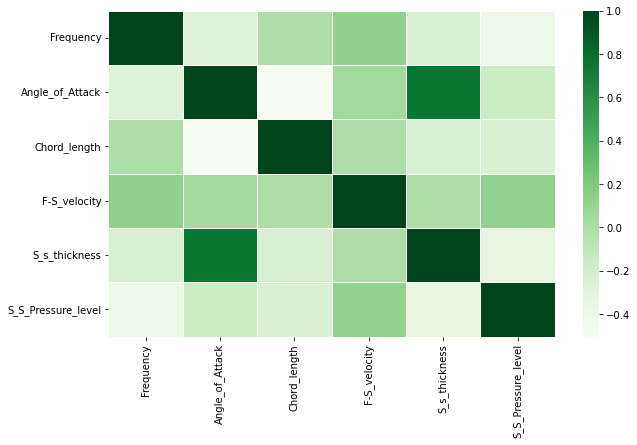

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cor, linewidths=0.5, cmap="Greens")

In [8]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [9]:
### first Do train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [10]:
X_train.head()

,Frequency,Angle_of_Attack,Chord_length,F-S_velocity,S_s_thickness
845,500,11.2,0.0508,71.3,0.014072
1026,10000,4.8,0.0254,55.5,0.000873
621,2000,7.2,0.1524,39.6,0.009092
1371,630,6.7,0.1016,31.7,0.005929
195,6300,0.0,0.2286,71.3,0.002143


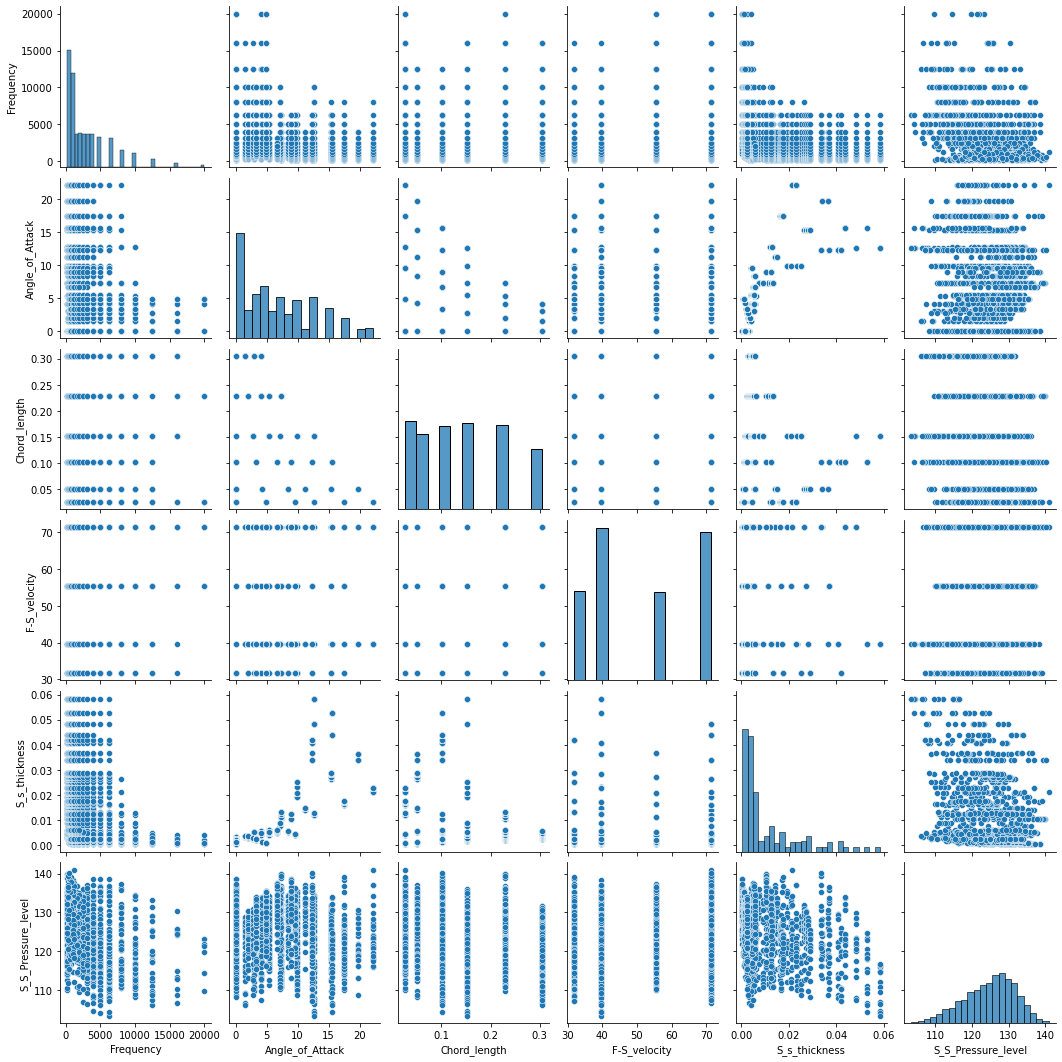

In [35]:
sns.pairplot(df)

C:\Users\ARYAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency'>

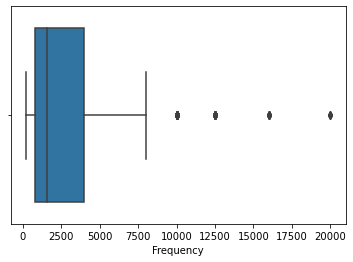

In [13]:
sns.boxplot(X_train['Frequency'])

C:\Users\ARYAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency', ylabel='S_S_Pressure_level'>

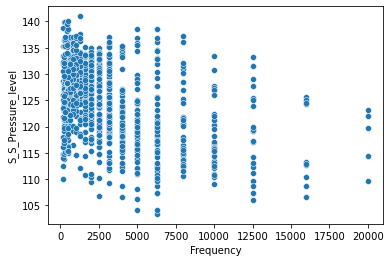

In [14]:
sns.scatterplot(X_train['Frequency'],y)

In [15]:
len(df['pressure level'].unique())

KeyError: 'pressure level'

In [ ]:
sns.boxplot(df['pressure level'])

In [36]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [37]:
import pickle
pickle.dump(regressor, open('model.pkl', 'wb'))

In [35]:
!pip install flask

In [36]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)

array([124.06768512, 119.59316737, 120.29933092, 129.61912851,
       129.81089779, 132.61068301, 122.44438053, 126.7461602 ,
       129.99906397, 125.94601069, 132.50626617, 113.78942913,
       130.10151743, 132.51123677, 123.6412694 , 114.10666435,
       124.31679905, 126.6766228 , 129.24252599, 131.79580713,
       125.77675782, 125.02970619, 116.44955941, 129.88018679,
       124.2232864 , 124.67967727, 131.60657138, 124.57186337,
       115.76458243, 123.39652912, 125.13674229, 123.92018299,
       125.4841971 , 118.61796101, 121.70395495, 130.95730463,
       131.39243856, 128.29169206, 121.31077749, 117.99901537,
       126.41139865, 128.86175217, 126.44075781, 123.46463781,
       123.08590861, 130.13707376, 125.11244177, 120.01115538,
       123.19344296, 132.81698484, 128.72414835, 117.7903339 ,
       123.4283675 , 122.57110308, 126.71758509, 120.44811529,
       123.29741941, 128.68403927, 124.25898336, 123.22309466,
       125.44226349, 131.08621938, 126.73671008, 131.37